Install necessary dependencies

In [1]:
!pip install opencv-python opencv-python-headless
!pip install torch torchvision torchaudio
!git clone https://github.com/serengil/retinaface.git
%cd retinaface
!pip install .


Cloning into 'retinaface'...
remote: Enumerating objects: 831, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 831 (delta 257), reused 237 (delta 237), pack-reused 517 (from 1)
Receiving objects: 100% (831/831), 13.77 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (450/450), done.
/content/retinaface
Processing /content/retinaface
  Preparing metadata (setup.py) ... done
  Created wheel for retina-face: filename=retina_face-0.0.17-py3-none-any.whl size=26032 sha256=17e203a2ec2246251a37f78c86ad52dbfb0ddf4846c56286f70c9415fb512caa
  Stored in directory: /tmp/pip-ephem-wheel-cache-_y0fdl26/wheels/67/77/27/907f54ed9f00759d5f26562c3d36ea3d142ca36dfa7bd0545b
Successfully built retina-face


Import necessary libraries

In [2]:
import cv2
import os
from google.colab import files
from google.colab.patches import cv2_imshow
from retinaface import RetinaFace

Upload Images and creating a file to save

In [3]:
# Upload images (multiple uploads supported)
uploaded = files.upload()

# Create a folder to store processed images
output_folder = "processed_images"
os.makedirs(output_folder, exist_ok=True)

Saving download.jpeg to download.jpeg


Image Processing and face detection and saving

In [4]:
# Process each uploaded image
for file_name in uploaded.keys():
    # Load the uploaded image
    image = cv2.imread(file_name)

    if image is None:
        print(f"Failed to load image: {file_name}")
        continue

    # Perform face detection with RetinaFace
    faces = RetinaFace.detect_faces(file_name)

    if isinstance(faces, dict):
        face_counter = 0  # Counter to uniquely name each face
        for key, face in faces.items():

            # Draw bounding box on the original image
            x_min, y_min, x_max, y_max = face["facial_area"]
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Crop and save each detected face
            face_crop = image[y_min:y_max, x_min:x_max]
            face_output_path = os.path.join(output_folder, f"face_{file_name}_{face_counter}.jpg")
            if cv2.imwrite(face_output_path, face_crop):
                print(f"Saved face: {face_output_path}")
            else:
                print(f"Failed to save face: {face_output_path}")

            face_counter += 1

    else:
        print(f"No faces detected in image: {file_name}")

    # Save the processed image with bounding boxes and landmarks
    processed_image_path = os.path.join(output_folder, f"processed_{file_name}")
    if cv2.imwrite(processed_image_path, image):
        print(f"Processed and saved: {processed_image_path}")
    else:
        print(f"Failed to save the processed image: {processed_image_path}")


24-12-09 02:26:02 - Directory /root/.deepface created
24-12-09 02:26:02 - Directory /root/.deepface/weights created
24-12-09 02:26:02 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 77.0MB/s]


Saved face: processed_images/face_download.jpeg_0.jpg
Saved face: processed_images/face_download.jpeg_1.jpg
Saved face: processed_images/face_download.jpeg_2.jpg
Saved face: processed_images/face_download.jpeg_3.jpg
Processed and saved: processed_images/processed_download.jpeg


listing and displaying processed images

Processed images saved in: processed_images
Processed files: ['face_download.jpeg_3.jpg', 'face_download.jpeg_2.jpg', 'processed_download.jpeg', 'face_download.jpeg_1.jpg', 'face_download.jpeg_0.jpg']
Displaying: face_download.jpeg_3.jpg


Displaying: face_download.jpeg_2.jpg


Displaying: processed_download.jpeg


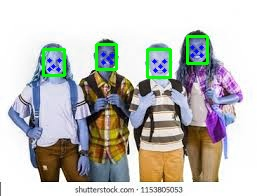

Displaying: face_download.jpeg_1.jpg
Displaying: face_download.jpeg_0.jpg


In [5]:
# List processed images
processed_files = os.listdir(output_folder)
print("Processed images saved in:", output_folder)
print("Processed files:", processed_files)

# Display processed images
for file_name in processed_files:
    file_path = os.path.join(output_folder, file_name)
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for correct display
        print(f"Displaying: {file_name}")
        cv2_imshow(image)
    else:
        print(f"Failed to display image: {file_name}")

Download processed images

In [6]:
# Download individual processed images
print("Downloading processed images...")
for file_name in processed_files:
    file_path = os.path.join(output_folder, file_name)
    files.download(file_path)

# Zip the folder and download as a single archive
# import shutil
# archive_path = shutil.make_archive(output_folder, 'zip', output_folder)
# print("Downloading processed images as a ZIP file...")
# files.download(archive_path)

# Save the processed image to the folder
#    output_path = os.path.join(output_folder, f"processed_{file_name}")
#    if cv2.imwrite(output_path, image):
#        print(f"Processed and saved: {output_path}")
#    else:
#        print(f"Failed to save the processed image: {output_path}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/////// no need to run

In [ ]:
# Install necessary dependencies
# !pip install opencv-python opencv-python-headless
# !pip install torch torchvision torchaudio
# !git clone https://github.com/serengil/retinaface.git
# %cd retinaface
# !pip install .

# Import necessary libraries
# import cv2
# import os
# from google.colab import files
# from google.colab.patches import cv2_imshow
# from retinaface import RetinaFace

# Upload images (multiple uploads supported)
# uploaded = files.upload()

# Create a folder to store processed images
# output_folder = "processed_images"
# os.makedirs(output_folder, exist_ok=True)

# Process each uploaded image
# for file_name in uploaded.keys():
#     # Load the uploaded image
#     image = cv2.imread(file_name)

#     # Check if the image was loaded successfully
#     if image is None:
#         print(f"Failed to load image: {file_name}")
#         continue

#     # Perform face detection with RetinaFace
#     faces = RetinaFace.detect_faces(file_name)

#     # Check if faces were detected
#     if isinstance(faces, dict):
#         for key, face in faces.items():
#             # Draw bounding box
#             x_min, y_min, x_max, y_max = face["facial_area"]
#             cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

#             # Draw facial landmarks
#             landmarks = face.get("landmarks", {})
#             for point in landmarks.values():
#                 cv2.circle(image, tuple(map(int, point)), 2, (0, 0, 255), -1)

#     else:
#         print(f"No faces detected in image: {file_name}")

#     # Save the processed image
#     output_path = os.path.join(output_folder, f"processed_{file_name}")
#     if cv2.imwrite(output_path, image):
#         print(f"Processed and saved: {output_path}")
#     else:
#         print(f"Failed to save the processed image: {output_path}")

# List processed images
# processed_files = os.listdir(output_folder)
# print("Processed images saved in:", output_folder)
# print("Processed files:", processed_files)

# Display processed images
# for file_name in processed_files:
#     file_path = os.path.join(output_folder, file_name)
#     image = cv2.imread(file_path)
#     if image is not None:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for correct display
#         print(f"Displaying: {file_name}")
#         cv2_imshow(image)
#     else:
#         print(f"Failed to display image: {file_name}")


fatal: destination path 'retinaface' already exists and is not an empty directory.
/content/retinaface/retinaface
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


KeyboardInterrupt: 